# Hands on introduction to deep learning with Keras

## ImageXD, September 11th, 2019

[Ariel Rokem](https://arokem.org) and [Anisha Keshavan](https://anisha.pizza/braindr-results/#/)

In [0]:
!wget -nc https://raw.githubusercontent.com/arokem/conv-nets/master/conv_net_utils.py

--2019-09-12 22:57:28--  https://raw.githubusercontent.com/arokem/conv-nets/master/conv_net_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5200 (5.1K) [text/plain]
Saving to: ‘conv_net_utils.py’

conv_net_utils.py   100%[===================>]   5.08K  --.-KB/s    in 0s      

2019-09-12 22:57:28 (102 MB/s) - ‘conv_net_utils.py’ saved [5200/5200]



In [0]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

A single-layered neural net is simply a set of weights 

<img src='https://raw.githubusercontent.com/arokem/conv-nets/master/img/nn-1.png' width=500px>

Where: 

$X_{21} = X_{11} w^2_{11} + X_{12} w^2_{21}$

Let's implement this in code:

In [0]:
x11 = 1 
x12 = 2
w_2_11 = -2
w_2_21 = 3

In [0]:
x21 = w_2_11 * x11 + w_2_21 * x12

In [0]:
print(x21)

4


More generally: 

$X_{21} = w^2 \cdot X_{1}$


In [0]:
x21 = np.dot([w_2_11, w_2_21], [x11, x12])

In [0]:
print(x21)

4


A multi-layered network will add to that another set of weights: 

<img src='https://raw.githubusercontent.com/arokem/conv-nets/master/img/nn-2.png' width=500px>

In [0]:
x11 = 1 
x12 = 2

w_2_11 = -2
w_2_21 = 3
w_2_12 = 2
w_2_22 = -3

w_3_11 = 3
w_3_21 = 2

In [0]:
x21 = np.dot([w_2_11, w_2_21], [x11, x12])
x22 = np.dot([w_2_12, w_2_22], [x11, x12])

x31 = np.dot([w_3_11, w_3_21], [x21, x22])

In [0]:
print(x31)

4


Things get more interesting when an activation function is added to each unit:

<img src='https://raw.githubusercontent.com/arokem/conv-nets/master/img/nn-3.png' width=500px>

Different functions that are used include the hyperbolic tangent:

In [0]:
x = np.arange(-np.pi, np.pi, 0.001)

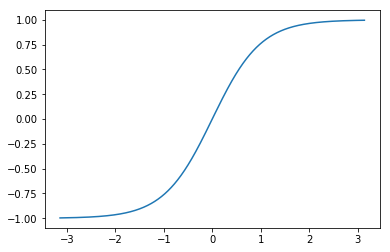

In [0]:
plt.plot(x, np.tanh(x))

Another function that has been used a lot, for both convenience, and because it induces sparsity, is a rectified linear unit:

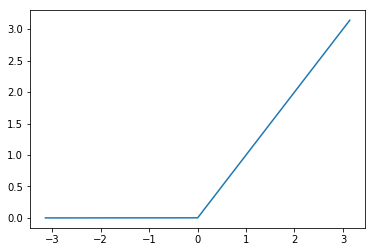

In [0]:
plt.plot(x, np.max([x, np.zeros(x.shape[0])], axis=0))

In [0]:
x21 = np.max([np.dot([w_2_11, w_2_21], [x11, x12]), 0])
x22 = np.max([np.dot([w_2_12, w_2_22], [x11, x12]), 0])

x31 = np.max([np.dot([w_3_11, w_3_21], [x21, x22]), 0])

In [0]:
print(x31)

12


Networks are trained through gradient descent: gradual changes to the values of the weights

The gradients are calculate through **backpropagation**

Error is propagated back through the network to calculate a gradient (derivative) for each weight by multiplying:

- The gradient of the loss function with respect to the node a weight feeds into
- The value of the node feeding into the weight
- The slope of the activation function of the node it feeds into

For example, for the network we had above, let's assume the desired output was 10, instead of 12

In [0]:
# We take the simplest possible error, the absolute difference:
e31 = x31 - 10

# We'll use this helper function to derive ReLU functions:
def d_relu(x):
    if x > 0:
        return 1
    else:
        return 0

e_3_11 = e31 * x21 * d_relu(x31)
e_3_21 = e31 * x22 * d_relu(x31)

e_2_11 = e_3_11 * x11 * d_relu(x21)
e_2_21 = e_3_11 * x12 * d_relu(x21)

e_2_12 = e_3_21 * x11 * d_relu(x22)
e_2_22 = e_3_21 * x12 * d_relu(x22)


In [0]:
lr = 0.01

In [0]:
w_3_11 = w_3_11 - e_3_11 * lr 
w_3_21 = w_3_11 - e_3_21 * lr 

w_2_11 = w_2_11 - e_2_11 * lr
w_2_12 = w_2_12 - e_2_12 * lr

w_2_21 = w_2_21 - e_2_21 * lr
w_2_22 = w_2_22 - e_2_22 * lr

In [0]:
x21 = np.max([np.dot([w_2_11, w_2_21], [x11, x12]), 0])
x22 = np.max([np.dot([w_2_12, w_2_22], [x11, x12]), 0])

x31 = np.max([np.dot([w_3_11, w_3_21], [x21, x22]), 0])

In [0]:
print(x31)

10.511999999999999


As we'll see next, depending on the error function that is used, neural nets can be used for other tasks as well

# Multilayer networks with Keras 


We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [0]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from conv_net_utils import generate_dataset

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### The first example is a linearly separable data-set:

In [0]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, 
                                                                    n_train=1000, 
                                                                    n_test=200, 
                                                                    num_labels=2,
                                                                    centers=2, 
                                                                    center_box=[-4., 4.])

In [0]:
train_data.shape, train_labels.shape

((1000, 2), (1000, 2))

In [0]:
train_data[:10]

array([[-3.510066 ,  1.6637349],
       [ 3.6430275, -3.1075144],
       [ 3.9449306, -4.4770865],
       [ 1.9606985, -3.0868623],
       [ 2.5202012, -2.6115093],
       [-2.4843352,  1.6262926],
       [ 3.105968 , -4.0054593],
       [-0.9625634,  0.8052578],
       [-0.926659 ,  3.3542166],
       [-4.71131  ,  2.3225498]], dtype=float32)

In [0]:
train_labels[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

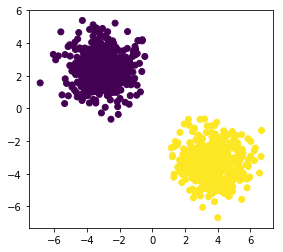

In [0]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 4s 6ms/step - loss: 0.8111 - acc: 0.4713 - val_loss: 0.5765 - val_acc: 0.6000
Epoch 2/5
800/800 [==============================] - 0s 45us/step - loss: 0.5359 - acc: 0.5925 - val_loss: 0.4120 - val_acc: 0.8400
Epoch 3/5
800/800 [==============================] - 0s 48us/step - loss: 0.3858 - acc: 0.9475 - val_loss: 0.3045 - val_acc: 1.0000
Epoch 4/5
800/800 [==============================] - 0s 46us/step - loss: 0.2834 - acc: 1.0000 - val_loss: 0.2277 - val_acc: 1.0000
Epoch 5/5
800/800 [==============================] - 0s 59us/step - loss: 0.2100 - acc: 1.0000 - val_loss: 0.1714 - val_acc: 1.0000


In [0]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)

200/200 [==============================] - 0s 57us/step


In [0]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.17629563063383102
acc : 1.0


In [0]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

In [0]:
prediction

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

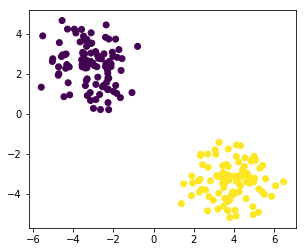

In [0]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')



### The next set of data is not linearly separable:

In [0]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, 
                                                                    n_train=1000,
                                                                    n_test=200, 
                                                                    noise=0.2, 
                                                                    num_labels=2,
                                                                    factor=0.1)

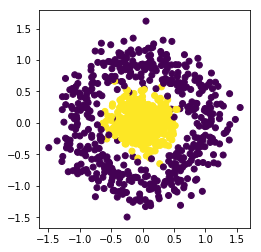

In [0]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=np.where(train_labels)[1])
ax.set_aspect('equal')

In [0]:
model.fit(train_data, train_labels, nb_epoch=5, batch_size=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 49us/step - loss: 0.6903 - acc: 0.4737 - val_loss: 0.6885 - val_acc: 0.4850
Epoch 2/5
800/800 [==============================] - 0s 50us/step - loss: 0.6814 - acc: 0.4912 - val_loss: 0.6793 - val_acc: 0.5350
Epoch 3/5
800/800 [==============================] - 0s 62us/step - loss: 0.6715 - acc: 0.5262 - val_loss: 0.6691 - val_acc: 0.5900
Epoch 4/5
800/800 [==============================] - 0s 47us/step - loss: 0.6603 - acc: 0.5550 - val_loss: 0.6580 - val_acc: 0.6150
Epoch 5/5
100/800 [==>...........................] - ETA: 0s - loss: 0.6789 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


800/800 [==============================] - 0s 54us/step - loss: 0.6484 - acc: 0.5887 - val_loss: 0.6464 - val_acc: 0.6500


In [0]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 34us/step

loss : 0.6467780470848083
acc : 0.5999999940395355


In [0]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

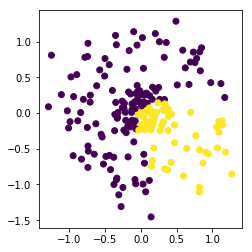

In [0]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')

In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 0s 281us/step - loss: 0.6917 - acc: 0.4050 - val_loss: 0.6671 - val_acc: 0.5700
Epoch 2/5
800/800 [==============================] - 0s 48us/step - loss: 0.6490 - acc: 0.5500 - val_loss: 0.6369 - val_acc: 0.6450
Epoch 3/5
800/800 [==============================] - 0s 63us/step - loss: 0.6191 - acc: 0.6500 - val_loss: 0.6108 - val_acc: 0.7150
Epoch 4/5
800/800 [==============================] - 0s 52us/step - loss: 0.5917 - acc: 0.7325 - val_loss: 0.5853 - val_acc: 0.7750
Epoch 5/5
800/800 [==============================] - 0s 53us/step - loss: 0.5651 - acc: 0.7538 - val_loss: 0.5599 - val_acc: 0.8150

200/200 [==============================] - 0s 43us/step

loss : 0.5538967251777649
acc : 0.800000011920929


In [0]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

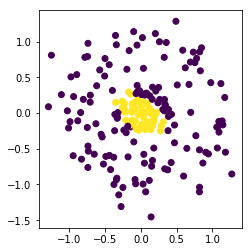

In [0]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=np.where(prediction)[1])
ax.set_aspect('equal')

# Brain quality control with a deep learning network

In a paper we recently [published](https://www.frontiersin.org/articles/10.3389/fninf.2019.00029/full), we 
trained a neural network to accurately discriminate between high-quality and low-quality brain T1-weighted images from the [Healthy Brain Network](http://fcon_1000.projects.nitrc.org/indi/cmi_healthy_brain_network/) dataset.

Here, we will do a slightly simpler task. Imagine that you have a dataset of brain saggital slices. In some images, the subjects are facing leftwards and in some images, the subjects are facing rightwards.

In [0]:
!wget -nc https://storage.googleapis.com/ohbm-dl-lindsay-data/Rokem_IXI_brain_data.npz

--2019-09-12 22:57:41--  https://storage.googleapis.com/ohbm-dl-lindsay-data/Rokem_IXI_brain_data.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 618670234 (590M) [application/octet-stream]
Saving to: ‘Rokem_IXI_brain_data.npz’

Rokem_IXI_brain_dat 100%[===================>] 590.01M  64.8MB/s    in 11s     

2019-09-12 22:57:52 (55.6 MB/s) - ‘Rokem_IXI_brain_data.npz’ saved [618670234/618670234]



In [0]:
brain_data = np.load("Rokem_IXI_brain_data.npz")
train_data = brain_data['train_data']
test_data = brain_data['test_data']
train_labels = brain_data['train_labels']


test_labels = brain_data['test_labels']

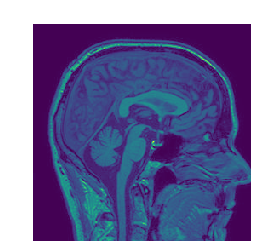

In [0]:
fig, ax = plt.subplots(1)
ax.matshow(train_data[0, :, :, 0])
ax.set_axis_off()

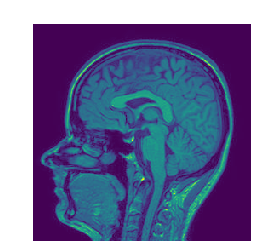

In [0]:
fig, ax = plt.subplots(1)
ax.matshow(train_data[1, :, :, 0])
ax.set_axis_off()

Let's train a neural network do discriminate between these two cases!

In [0]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((944, 256, 256, 1), (944,), (236, 256, 256, 1), (236,))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_data_flat = train_data.reshape((train_data.shape[0], -1))
test_data_flat = test_data.reshape((test_data.shape[0], -1))

In [0]:
train_data.shape

(944, 256, 256, 1)

In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data_flat.shape[-1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.fit(train_data_flat, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data_flat, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 755 samples, validate on 189 samples
Epoch 1/10
755/755 [==============================] - 1s 920us/step - loss: 8.0730 - acc: 0.4927 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 2/10
755/755 [==============================] - 0s 526us/step - loss: 8.0502 - acc: 0.4993 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 3/10
755/755 [==============================] - 0s 533us/step - loss: 8.0502 - acc: 0.4993 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 4/10
755/755 [==============================] - 0s 533us/step - loss: 8.0502 - acc: 0.4993 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 5/10
755/755 [==============================] - 0s 546us/step - loss: 8.0502 - acc: 0.4993 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 6/10
755/755 [==============================] - 0s 504us/step - loss: 8.0502 - acc: 0.4993 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 7/10
755/755 [==============================] - 0s 497us/step - loss: 8.0502 - acc: 0.4993 - val_loss: 8.0164 - val_acc: 0.5026
Epoch 8/10
755/7

# What is a convolution? 

In [0]:
from conv_net_utils import plot_with_annot

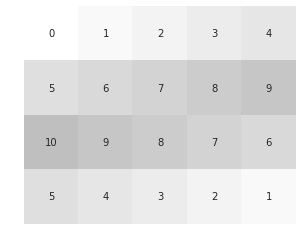

In [0]:
small_image = np.concatenate([np.arange(10), np.arange(10, 0, -1)]).reshape((4, 5))
fig1 = plot_with_annot(small_image)

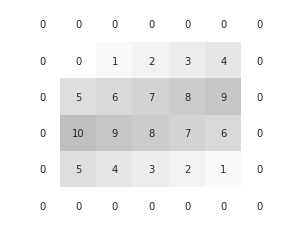

In [0]:
small_image = np.pad(small_image, 1, 'constant')
fig1 = plot_with_annot(small_image)

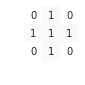

In [0]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

fig2 = plot_with_annot(kernel) 
fig2.set_size_inches([1, 1])

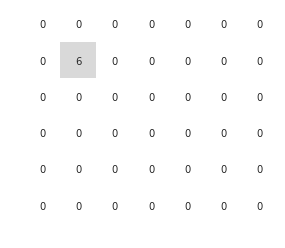

In [0]:
result = np.zeros(small_image.shape)

result[1, 1] += np.sum(small_image[:3, :3] * kernel)
fig3 = plot_with_annot(result)

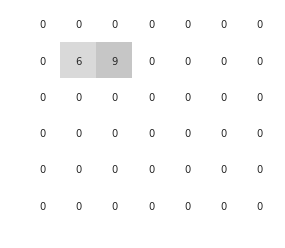

In [0]:
result[1, 2] += np.sum(small_image[:3, 1:4] * kernel)
fig3 = plot_with_annot(result)

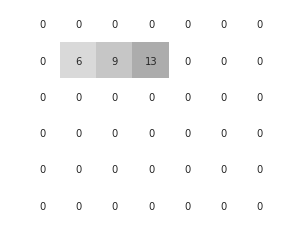

In [0]:
result[1, 3] += np.sum(small_image[:3, 2:5] * kernel)
fig3 = plot_with_annot(result)

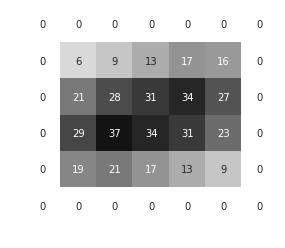

In [0]:
result = np.zeros(small_image.shape)

for ii in range(small_image.shape[0]-2):
    for jj in range(small_image.shape[1]-2):
        result[ii+1, jj+1] = np.sum(small_image[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

_ = plot_with_annot(result)

In [0]:
im = train_data[0, :, :, 0]

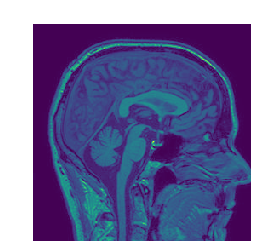

In [0]:
fig, ax = plt.subplots(1)
ax.matshow(im)
ax.set_axis_off()

In [0]:
conv = np.zeros(im.shape)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)


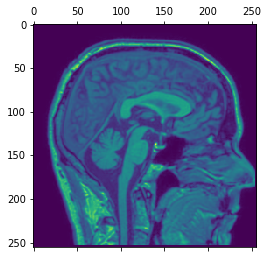

In [0]:
plt.matshow(conv)

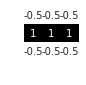

In [0]:
kernel = np.array([[-0.5, -0.5, -0.5], [1, 1, 1], [-0.5, -0.5, -0.5]])
fig2 = plot_with_annot(kernel, vmax=1)
fig2.set_size_inches([1, 1])

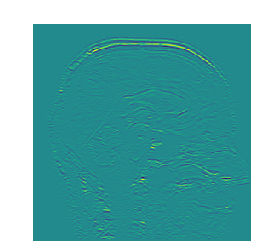

In [0]:
conv = np.zeros(im.shape)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

fig, ax = plt.subplots(1)
ax.matshow(conv)
ax.set_axis_off()

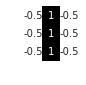

In [0]:
kernel = np.array([[-0.5, 1, -0.5], [-0.5, 1, -0.5], [-0.5, 1, -0.5]])
fig2 = plot_with_annot(kernel, vmax=1)
fig2.set_size_inches([1, 1])

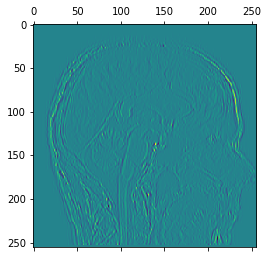

In [0]:
conv = np.zeros(im.shape)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

plt.matshow(conv)

# Why are convolutions useful for neural networks?

- Natural images contain correlations
- Reduce the number of parameters in training

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout, Conv1D

In [0]:
Conv1D()

TypeError: ignored

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=train_data.shape[1:], activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit(train_data, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

In [0]:
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD

In [0]:
kernel_size = (3, 3)
n_classes = 2

filters = 8

model = Sequential()

model.add(Conv2D(filters, kernel_size, activation='relu', 
                 input_shape=(256, 256, 1)))
# zero mean unit variance
model.add(BatchNormalization())

model.add(MaxPooling2D())
model.add(Conv2D(filters*2, kernel_size, activation='relu'))

model.add(MaxPooling2D())
model.add(Conv2D(filters*4, kernel_size, activation='relu'))

model.add(MaxPooling2D())
model.add(Conv2D(filters*8, kernel_size, activation='relu'))

model.add(MaxPooling2D())
model.add(Conv2D(filters*16, kernel_size, activation='relu'))

model.add(MaxPooling2D())
model.add(Conv2D(filters*32, kernel_size, activation='relu'))

model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

learning_rate = 1e-5
# optimizer
adam = Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=adam, # swap out for sgd 
              metrics=['accuracy'])

model.summary()

In [0]:
model.fit(train_data, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

## Bonus: visualize the activations in the network



In [0]:
from keras import backend as K

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

def show_activation(layer_name):
    
    layer_output = layer_dict[layer_name].output

    fn = K.function([model.input], [layer_output])
    
    inp = train_data[0:1]
    
    this_hidden = fn([inp])[0]
    
    # plot the activations from the first 8 filters
    plt.figure(figsize=(15,8))
    for i in range(8):
        plt.subplot(1,8,i+1)
        plt.imshow(this_hidden[0,:,:,i], plt.cm.Greys_r)
        plt.axis('off')
    
    return

In [0]:
show_activation('conv2d_2')

In [0]:
show_activation('conv2d_3')

In [0]:
show_activation('conv2d_4')

In [0]:
show_activation('conv2d_4')

In [0]:
show_activation('conv2d_4')

In [0]:
show_activation('conv2d_5')

In [0]:
show_activation('conv2d_6')

In [0]:
show_activation('conv2d_7')